In [1]:
%config InlineBackend.figure_format = 'retina' # 시각화 데이터를 더 선명하게 함
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
import numpy as np

# 한글 및 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False
import csv
import numpy as np
import matplotlib.pyplot as plt


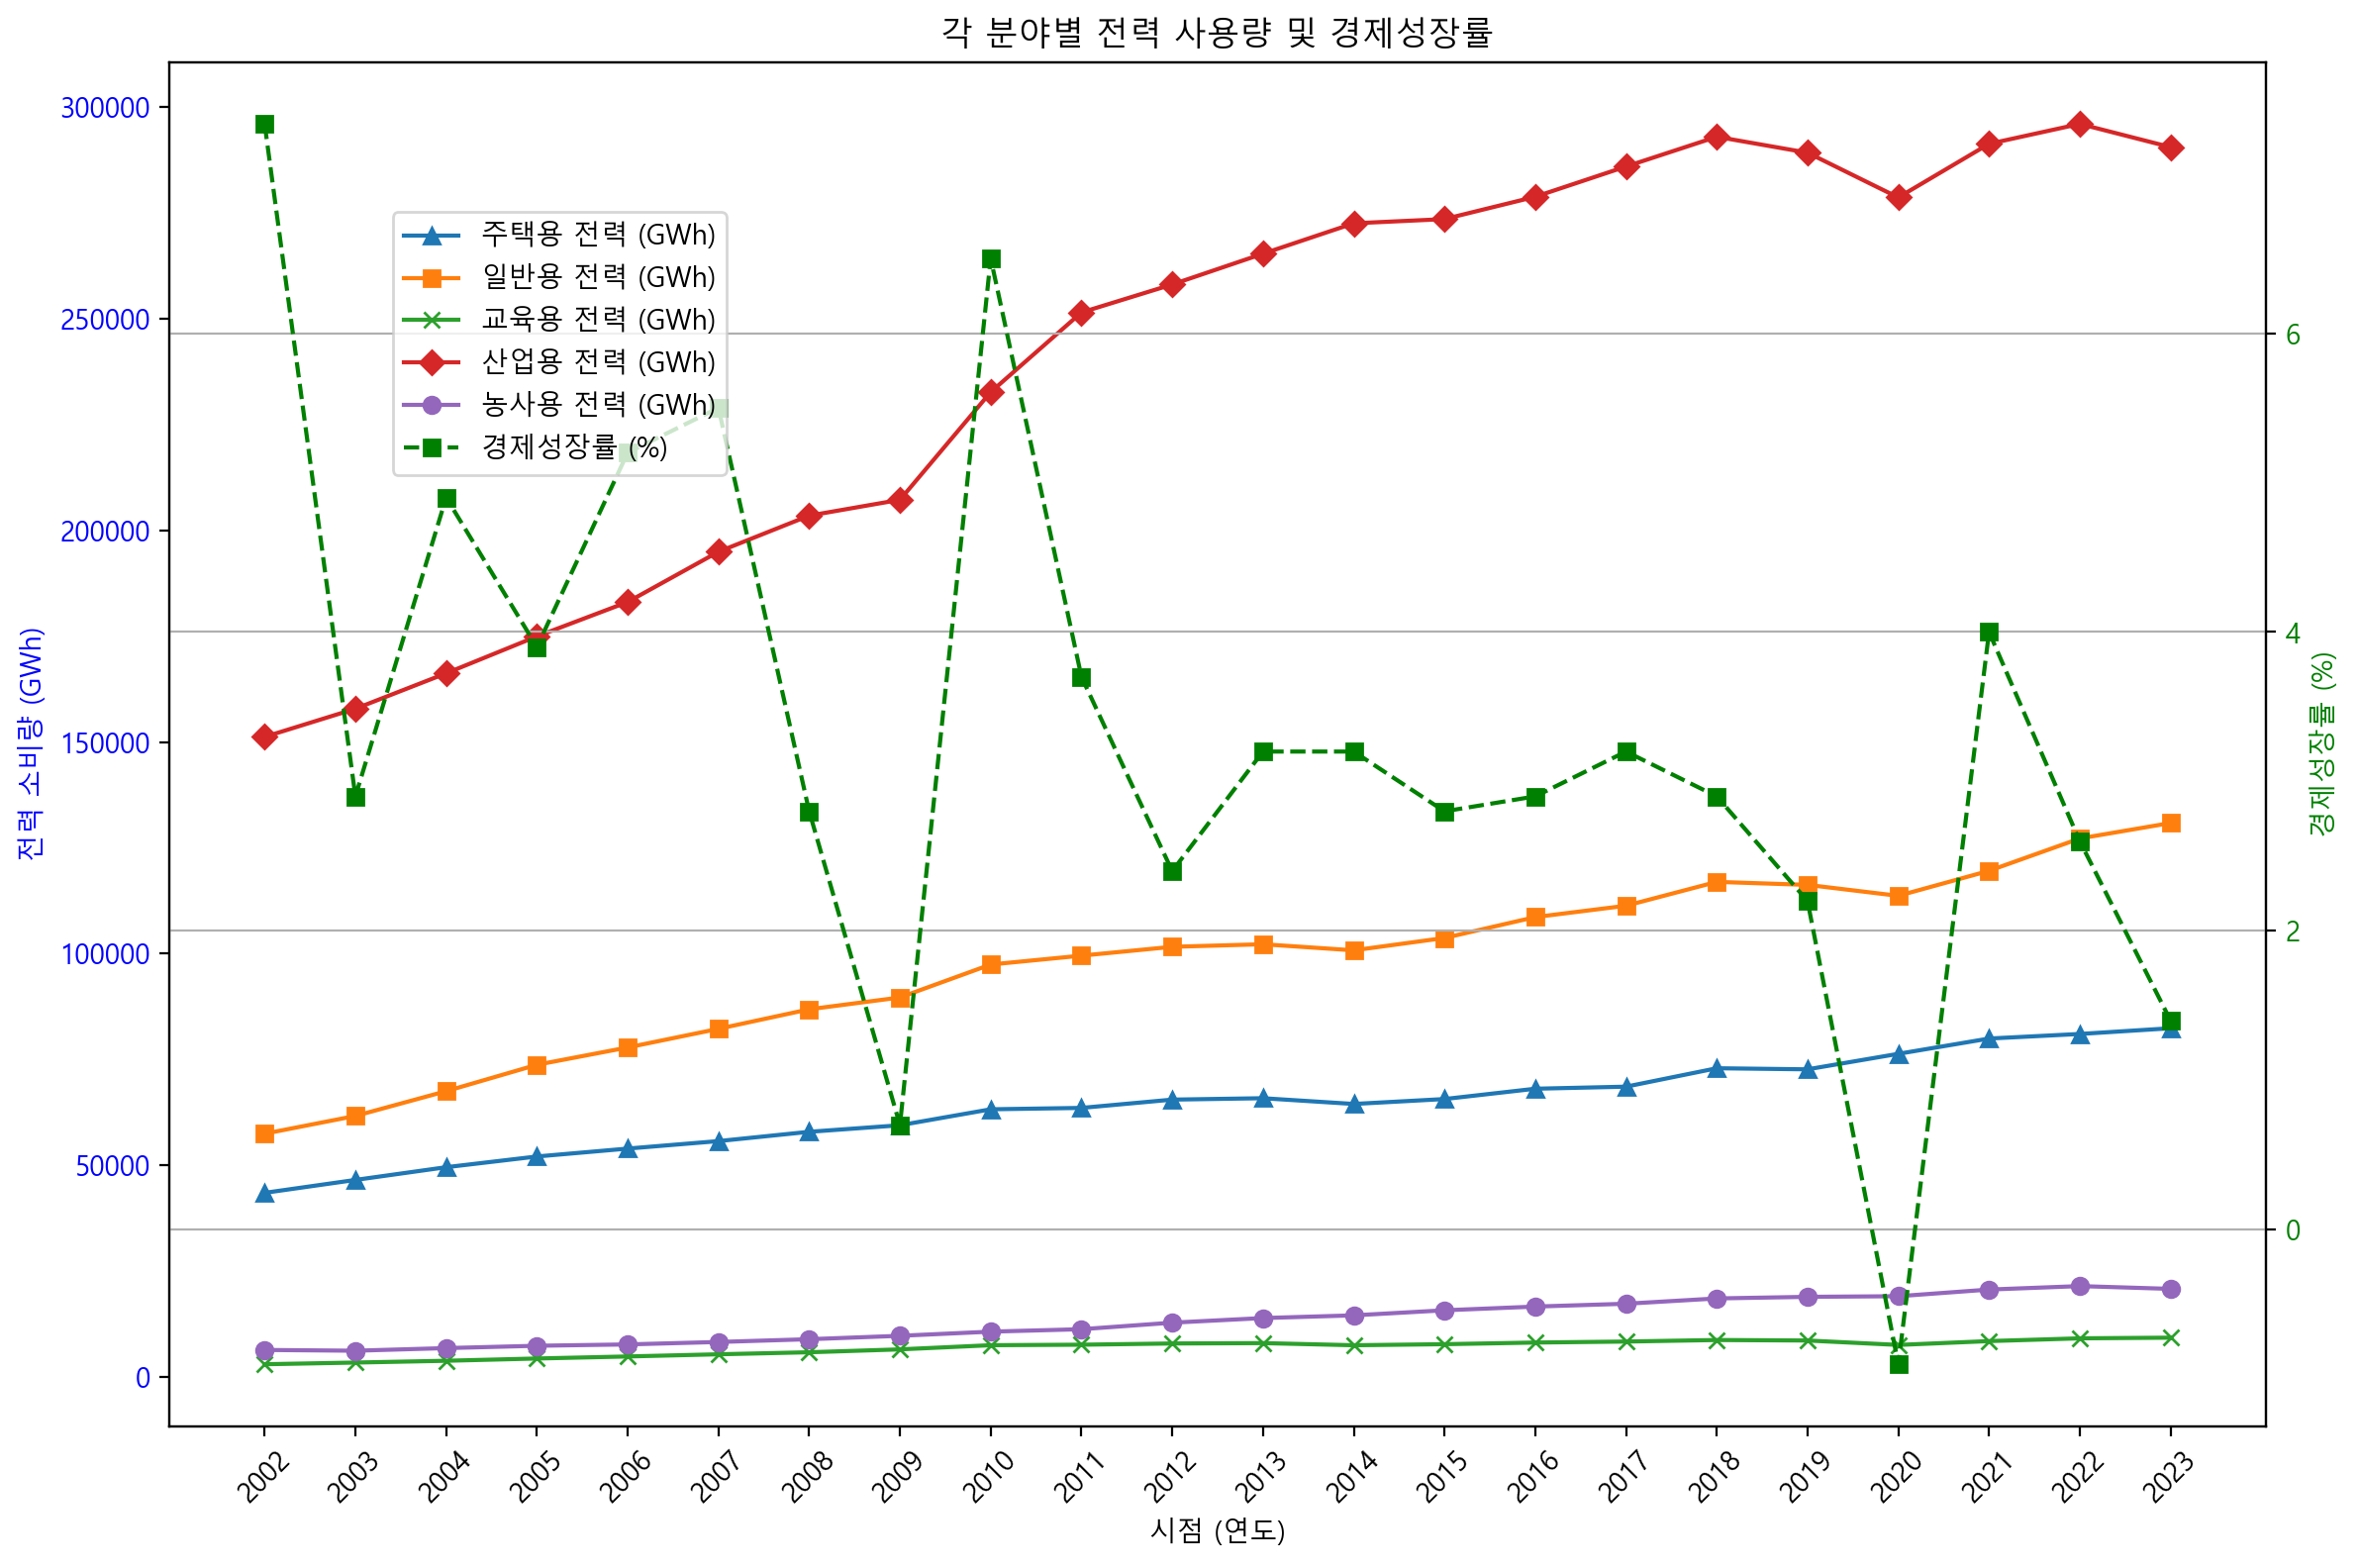

In [2]:
import matplotlib.pyplot as plt
import csv

# '연도별_전력수급_실적.csv' 파일을 열고 데이터 읽기
f = open('연도별_전력수급_실적.csv', encoding='cp949')
data = csv.reader(f)
next(data)  # 헤더를 건너뛰기

# 데이터 초기화
years = []
growth_rate = []
Residential_Power = []  # 주택용
General_Power = []      # 일반용
Educational_Power = []  # 교육용
Industrial_Power = []   # 산업용
Agricultural_Power = [] # 농사용

# 데이터 추출
for row in data:
    years.append(row[0])  # 시점(연도)
    growth_rate.append(float(row[1]))  # '경제성장률 (%)' (두 번째 열)
    Residential_Power.append(float(row[-11]))  # '주택용판매전력량' (-11 열)
    General_Power.append(float(row[-10]))  # '일반용판매전력량' (-10 열)
    Educational_Power.append(float(row[-9]))  # '교육용판매전력량' (-9 열)
    Industrial_Power.append(float(row[-8]))  # '산업용판매전력량' (-8 열)
    Agricultural_Power.append(float(row[-7]))  # '농사용판매전력량' (-7 열)

f.close()  # 파일 닫기

# 시각화를 위한 플롯 생성
fig, ax1 = plt.subplots(figsize=(12, 8))

# 첫 번째 y축: 각 분야별 전력 사용량
ax1.plot(years, Residential_Power, marker='^', label='주택용 전력 (GWh)', linestyle='-')
ax1.plot(years, General_Power, marker='s', label='일반용 전력 (GWh)', linestyle='-')
ax1.plot(years, Educational_Power, marker='x', label='교육용 전력 (GWh)', linestyle='-')
ax1.plot(years, Industrial_Power, marker='D', label='산업용 전력 (GWh)', linestyle='-')
ax1.plot(years, Agricultural_Power, marker='o', label='농사용 전력 (GWh)', linestyle='-')

ax1.set_xlabel('시점 (연도)')
ax1.set_ylabel('전력 소비량 (GWh)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# x축의 tick 위치를 설정
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years, rotation=45)

# 두 번째 y축: '경제성장률 (%)'
ax2 = ax1.twinx()
ax2.plot(years, growth_rate, marker='s', color='g', linestyle='--', label='경제성장률 (%)')
ax2.set_ylabel('경제성장률 (%)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# 범례 추가
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# 그래프 타이틀
plt.title('각 분야별 전력 사용량 및 경제성장률')

# 레이아웃 조정 및 출력
fig.tight_layout()
plt.grid(True)
plt.show()
